<a href="https://colab.research.google.com/github/Gauravchauhan764/Unsupervised-Clustering-for-Customer-Segmentation-Project/blob/main/Mid_Course_Summative_Assessment_Introduction_to_Machine_Learning_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Type: Unsupervised Clustering for Customer Segmentation**

**Business Objective and Desired Outcome**

**Objective:** Improve targeted marketing strategies by identifying distinct customer segments.

**Desired Outcome:** Increase customer engagement and sales through personalized marketing.

**Constraints & Limitations**

**Computational Power:** Limited GPU resources in the Colab environment.

**Budget:** No significant budget for external data sources or tools.

**Data Availability:** Historical customer data available for analysis.

**Obstacle:** Limited labeled data for supervised learning.

**Evaluation Metrics**

Silhouette Score for cluster quality.

Cohesion and Separation metrics for internal cluster evaluation.

**Relevancy to the Target Audience**

**Model Prediction Usage:** Segmentation insights to optimize marketing strategies.

**Data Availability**

**Ease of Data Collection:** Historical customer transactions and interactions data.

**Necessary Features Required:** Customer demographics, purchase history, and interaction data.

**Scope of the Solution**

**Define capabilities:** Identify and visualize distinct customer segments.

**Manage Expectations:** Provide insights for marketing strategies.

**Deployment Considerations**

**Cloud Platform:** Consider cloud deployment for scalability.

**Integration:** Develop an API for easy integration with marketing systems.

**Data Description**

The original dataset, that can be found in this kaggle dataset. It contains information of 2240 customers, with 29 attributes each. These attributes are:


Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

YearBirth - Age of the customer Complain - 1 if the customer complained in the last 2 years

DtCustomer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

**Summary**

In this machine learning case study conducted in Google Colab, the focus is on Customer Segmentation using unsupervised clustering techniques, specifically emphasizing Silhouette Score, Cohesion, and Separation as evaluation metrics. The problem revolves around the retail industry, aiming to enhance marketing strategies through the identification of distinct customer segments. The project follows a structured approach, encompassing problem definition, data collection, preprocessing, exploratory data analysis (EDA), and model selection, training, and evaluation.

The initial steps involve understanding the industry, setting business objectives, and addressing constraints, with an emphasis on the relevance of the machine learning solution to the target audience. Data collection is discussed in terms of sources, volume, types, and quality, while preprocessing covers aspects such as handling missing values, outliers, and categorical encoding.

EDA is approached systematically, including distribution and relationship analysis, temporal considerations, and visualization techniques for complex data types. Model selection involves splitting data, choosing appropriate algorithms, and evaluating model performance with relevant metrics. Hyperparameter tuning, scalability considerations, and interpretability are also discussed.

The case study emphasizes the importance of proper documentation and explanation, which should be reflected in the Colab notebook. The provided code snippets are meant to guide the implementation process, with the expectation of clear interpretations and insights at each stage. The final deliverables include a well-structured Colab notebook showcasing the end-to-end data science process, a comprehensive report, and visualizations that enhance the understanding of customer segments for actionable marketing strategies.

# **GitHub Link -**  


### Import Libraries

In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [76]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

In [77]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier)

# To get different metric scores and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score)

In [78]:
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [79]:
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Alma Better Projects /Customer Segmentation.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
## Renaming columns
df.columns = ['customer_id','year_birth', 'education','marital_status','income', 'kid_home','teen_home','dt_customer','recency', 'mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish','mtn_sweet','mnt_gold','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month','accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2', 'conplain','z_cost_contact', 'z_revenue', 'response']


### Dataset Information

In [81]:
df.head()

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mtn_sweet,mnt_gold,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,conplain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.000,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [82]:
df.head(10)  # This will display the first ten rows of the DataFrame "df"

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mtn_sweet,mnt_gold,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,conplain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.000,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000,0,1,9/9/2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000,1,0,8/5/2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000,1,0,6/6/2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


### Dataset Rows & Columns count

In [83]:
# Assuming df is your DataFrame
shape_of_df = df.shape
print("Number of rows:", shape_of_df[0])
print("Number of columns:", shape_of_df[1])

Number of rows: 2240
Number of columns: 29


### Dataset Information

In [84]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            2240 non-null   int64  
 1   year_birth             2240 non-null   int64  
 2   education              2240 non-null   object 
 3   marital_status         2240 non-null   object 
 4   income                 2216 non-null   float64
 5   kid_home               2240 non-null   int64  
 6   teen_home              2240 non-null   int64  
 7   dt_customer            2240 non-null   object 
 8   recency                2240 non-null   int64  
 9   mnt_wines              2240 non-null   int64  
 10  mnt_fruits             2240 non-null   int64  
 11  mnt_meat               2240 non-null   int64  
 12  mnt_fish               2240 non-null   int64  
 13  mtn_sweet              2240 non-null   int64  
 14  mnt_gold               2240 non-null   int64  
 15  num_

In [85]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,2240.000,NaN,NaN,NaN,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
year_birth,2240.000,NaN,NaN,NaN,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,2216.000,NaN,NaN,NaN,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
kid_home,2240.000,NaN,NaN,NaN,0.444,0.538,0.000,0.000,0.000,1.000,2.000
teen_home,2240.000,NaN,NaN,NaN,0.506,0.545,0.000,0.000,0.000,1.000,2.000
dt_customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recency,2240.000,NaN,NaN,NaN,49.109,28.962,0.000,24.000,49.000,74.000,99.000
mnt_wines,2240.000,NaN,NaN,NaN,303.936,336.597,0.000,23.750,173.500,504.250,1493.000


#### Duplicate Values

In [86]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


#### Missing Values/Null Values

In [87]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values/Null Values Count:")
print(missing_values)

Missing Values/Null Values Count:
customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
conplain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64


In [88]:
## Fill null values with the mean
display(df.isnull().sum())

df = df.fillna(df['income'].mean())

assert (df.isnull().sum().sum() == 0)

customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
conplain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

Feature engineering: Creating new, useful features


In [89]:
# Create a feature with the total spent for the client
df['total_spent'] = df['mnt_wines']  + df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'] + df['mnt_gold']

# Create a feature with the % of money spent on essential item (food-related)
df['pct_essentials'] = (df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'])/df['total_spent']

# Create a feature with the number of purchases for each client
df['num_purchases'] = df['num_web_purchases']+df['num_catalog_purchases'] + df['num_store_purchases']+df['num_web_visits_month']

# Create a feature with the number of children
df['num_children'] = df['kid_home'] + df['teen_home']

# Create a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['num_deals_purchases'] / df['num_purchases']
df['pct_purchases_with_discount'].fillna(0, inplace=True)

# Create a feature with the age of the client, and another with the number of days since he's enrolled with the company
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

df['days_since_enrollment'] = ((datetime(2015,1,1) - df['dt_customer']).dt.days)

df['age'] =  2015 - df['year_birth']

In [90]:
#Group some categories that have a similar meaning
df['relationship'] = df['marital_status'].replace({'Married':1,'Together':1,
                            'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})

df["education"] = df["education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate',
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

#### Removing outliers

In [91]:
# Removing outliers
df = df[(df['age'] < 90) & (df['income'] < 200000)].reset_index(drop = True)

print("The new dataset have {} rows.".format(df.shape[0]))

The new dataset have 2236 rows.


In [92]:
## Since there are just 2 values with 0 purchases and both of them with a low total spent, we'll replace the 0's with 1's.
df.loc[(df['num_purchases'] == 0,'num_purchases')]=1

Visualizing the relationship between the "offers accepted", and the "percentual of purchases with discount

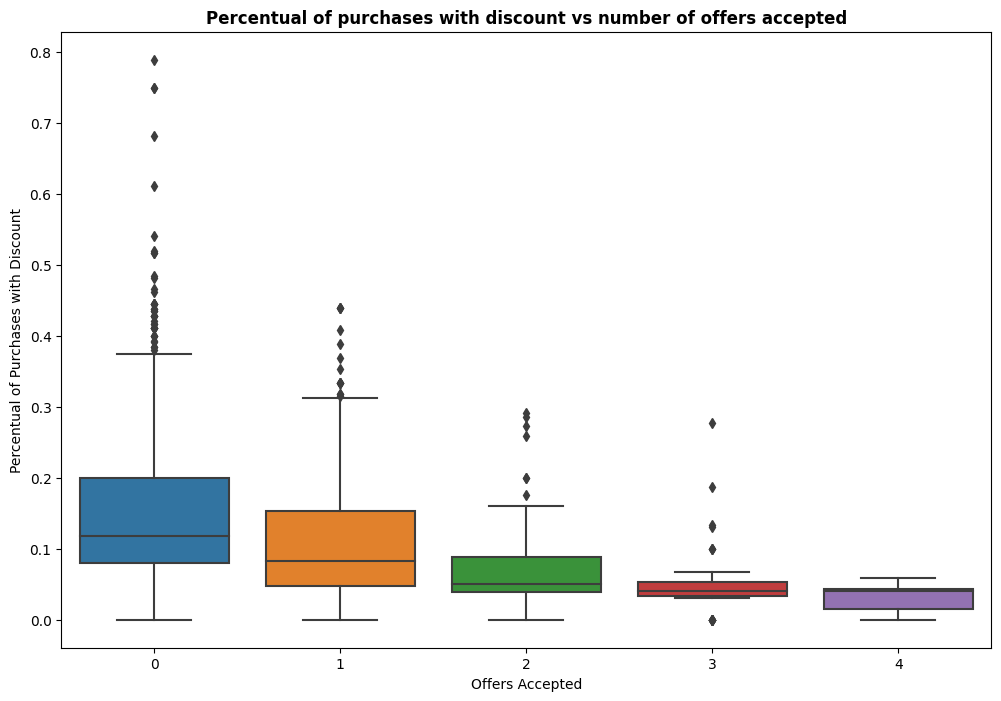

In [93]:
## Let's check the relationship between the "offers accepted", and the "percentual of purchases with discount"
df['accepted_sum'] = df['accepted_cpm3']+df['accepted_cpm4']+ df['accepted_cpm5'] + df['accepted_cpm1'] +df['accepted_cpm2']
plt.figure(figsize = (12,8))
plt.title('Percentual of purchases with discount vs number of offers accepted', fontweight = 'bold')
sns.boxplot(data = df, x = 'accepted_sum', y = 'pct_purchases_with_discount')
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount');

In [94]:

df = df.drop(['num_web_visits_month','recency', 'conplain', 'response', 'customer_id','dt_customer',
              'year_birth','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish',
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'z_cost_contact','z_revenue', 'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)

Visualizing the relationships between education and various purchase-related features

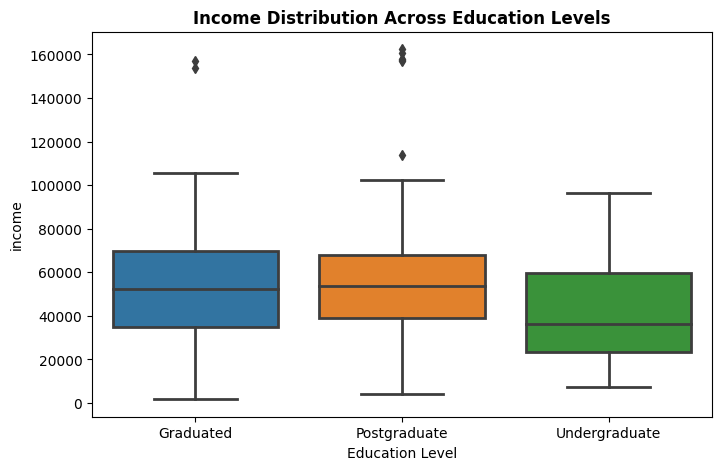

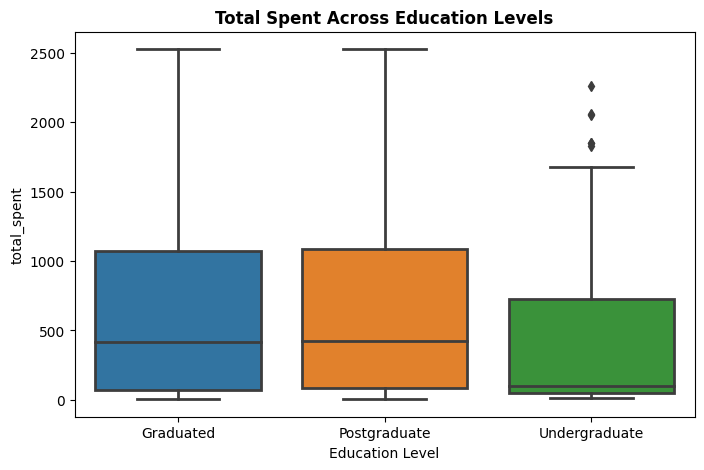

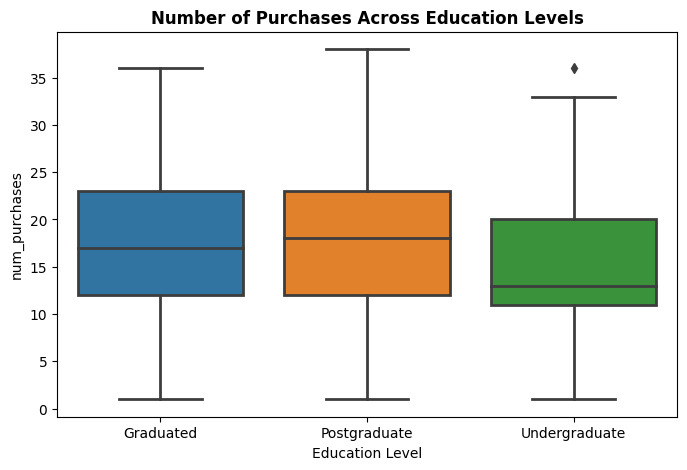

In [97]:
# Purchase behaviour vs Education

# Education vs Income
plt.figure(figsize=(8, 5))
plt.title("Income Distribution Across Education Levels", fontweight='bold', fontsize=12)
sns.boxplot(y=df['income'], x=df['education'], linewidth=2)
plt.xlabel("Education Level")
plt.show()

# Education vs Total Spent
plt.figure(figsize=(8, 5))
plt.title("Total Spent Across Education Levels", fontweight='bold', fontsize=12)
sns.boxplot(y=df['total_spent'], x=df['education'], linewidth=2)
plt.xlabel("Education Level")
plt.show()

# Education vs Number of Purchases
plt.figure(figsize=(8, 5))
plt.title("Number of Purchases Across Education Levels", fontweight='bold', fontsize=12)
sns.boxplot(y=df['num_purchases'], x=df['education'], linewidth=2)
plt.xlabel("Education Level")
plt.show()


In [98]:
df["education"] = df["education"].replace({'Graduated':'Postgraduate'})
df['education'] = df['education'].replace({"Postgraduate": 1})
df['education'] = df['education'].replace({"Undergraduate": 0})
df.rename(columns={'education': 'high_education'}, inplace = True)

##**Exploratory Data Analysis**

In [99]:
# Some descriptive statistics
df.describe()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
count,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000
mean,0.886,51961.907,2.326,605.987,0.421,17.866,0.951,0.136,538.180,46.102,0.645
std,0.318,21411.405,1.933,601.865,0.194,6.547,0.752,0.095,232.311,11.703,0.479
min,0.000,1730.000,0.000,5.000,0.028,1.000,0.000,0.000,26.000,19.000,0.000
25%,1.000,35502.500,1.000,69.000,0.263,12.000,0.000,0.067,366.750,38.000,0.000
50%,1.000,51684.000,2.000,396.500,0.429,17.000,1.000,0.111,539.000,45.000,1.000
75%,1.000,68275.750,3.000,1045.500,0.570,23.000,1.000,0.182,712.000,56.000,1.000
max,1.000,162397.000,15.000,2525.000,0.999,38.000,3.000,0.789,1089.000,75.000,1.000


In [101]:
# We'll create an auxiliar column, to help us with the visualization. It will be deleted afterwards.
df['age_group'] = df['age']//10*10

cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases',
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']

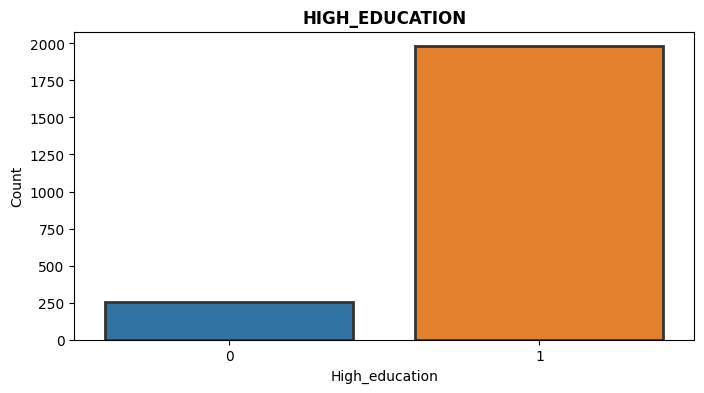

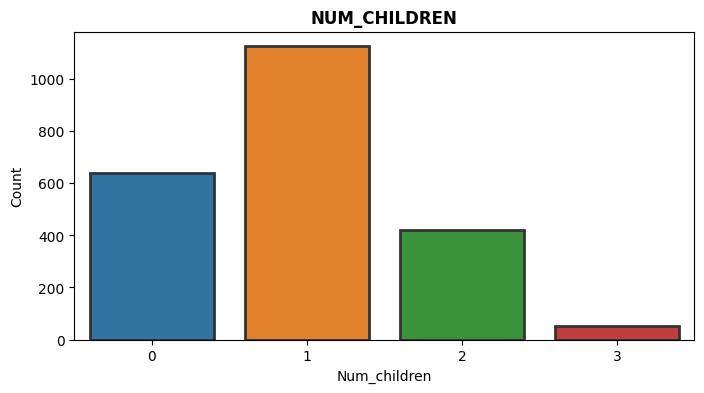

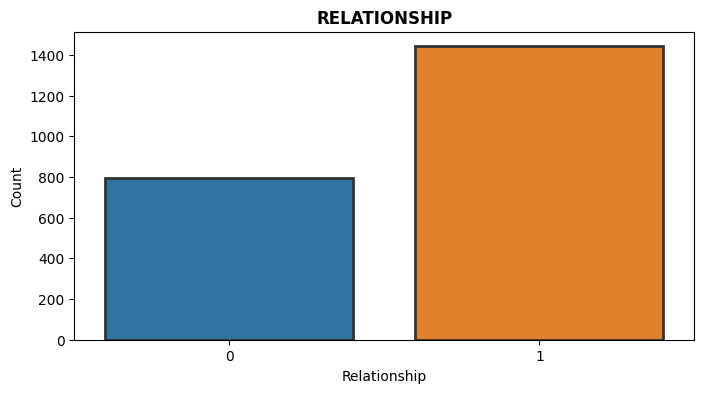

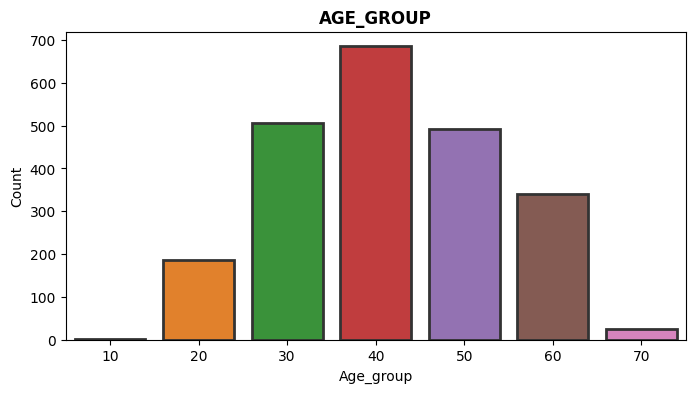

In [102]:
# Assuming cat_columns is a list of categorical column names

for cat in cat_columns:
    plt.figure(figsize=(8, 4))
    plt.title(str.upper(cat), fontweight='bold')
    aux = df.groupby(cat).size().reset_index()
    ax = sns.barplot(x=cat, data=aux, y=0, linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel=cat.capitalize())

    plt.show()

**Most of our customers:**

Are in a relationship

Have a high_education (graduated or more)

Have 1 children

Are between 30~60 years

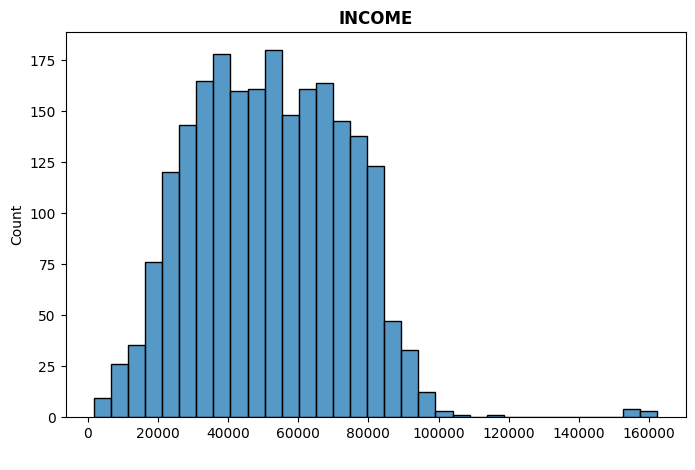

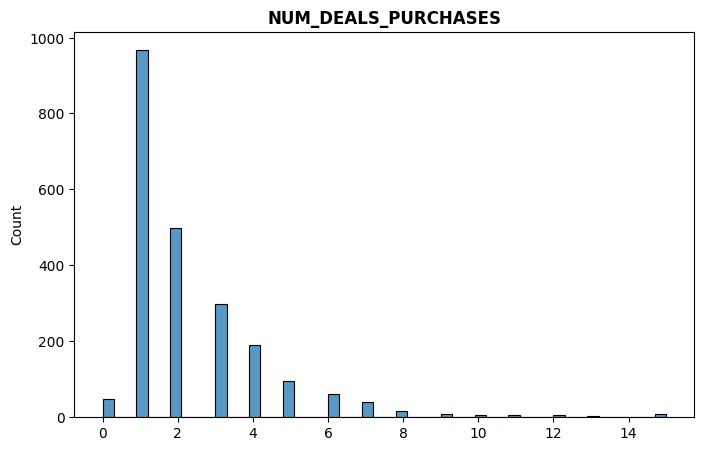

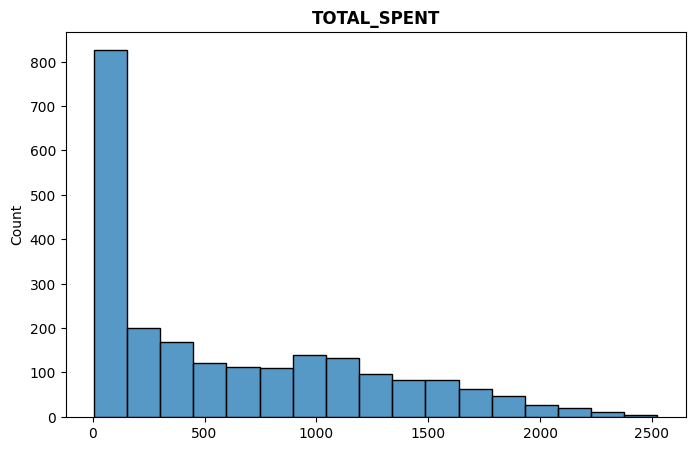

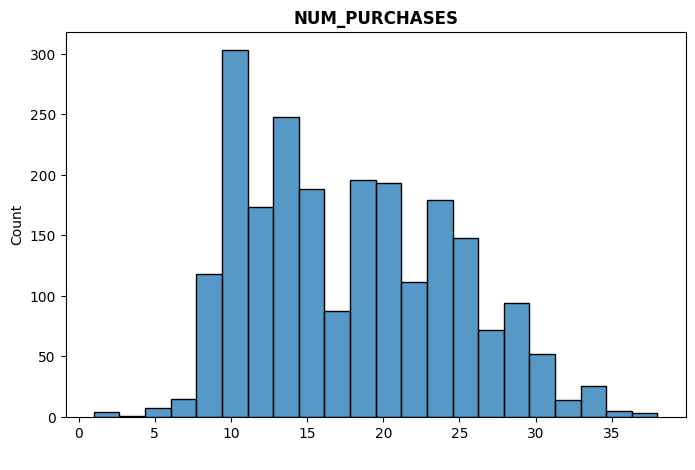

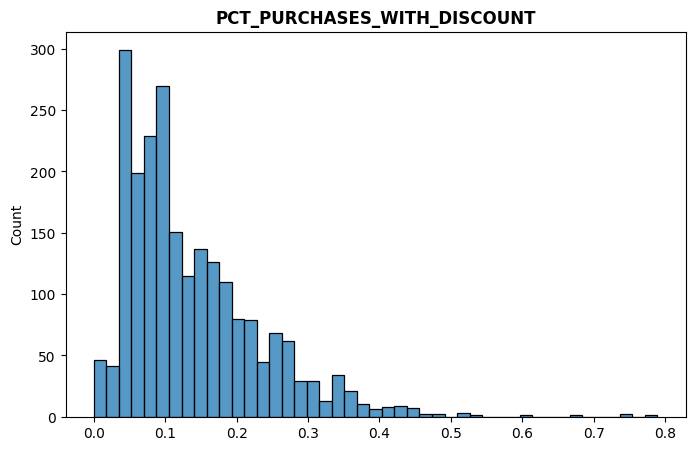

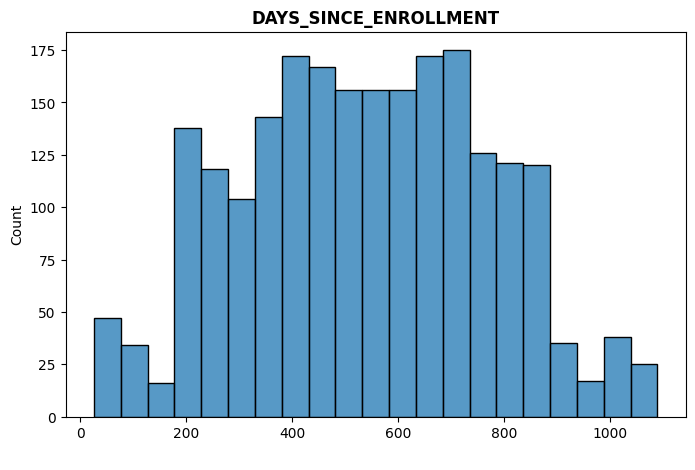

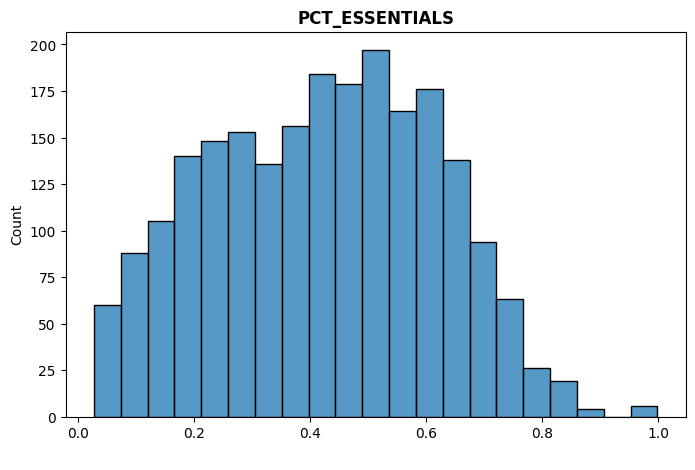

In [103]:
## Distribution of numerical variable

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.histplot(x=num, data=df)
    ax.set_xlabel(" ")
    plt.show()

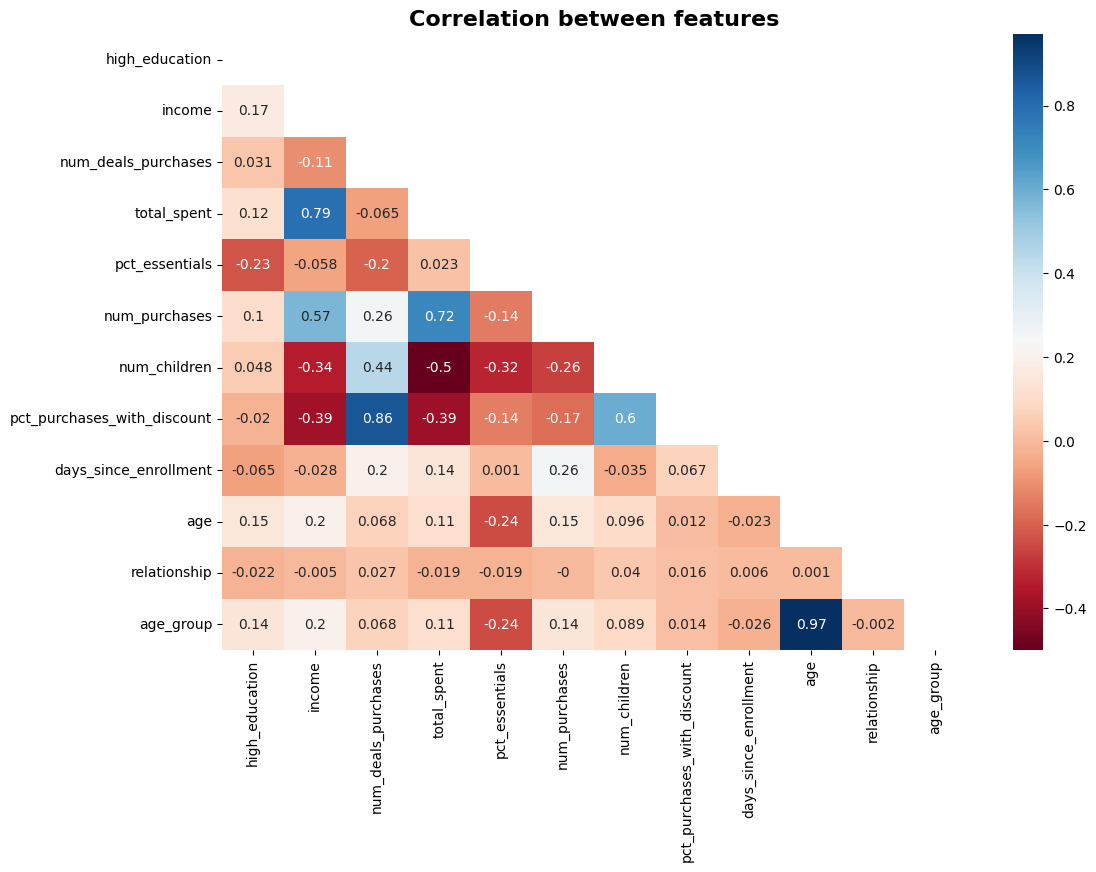

In [104]:
## Correlation Matrix
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12,8))
plt.title('Correlation between features', fontsize = 16, fontweight = 'bold')
sns.heatmap(round(df.corr(),3), annot=True, cmap="RdBu", mask = matrix);

**Visualizations to explore relationships between different variables in dataset**

Total Money Spent vs Number of Children

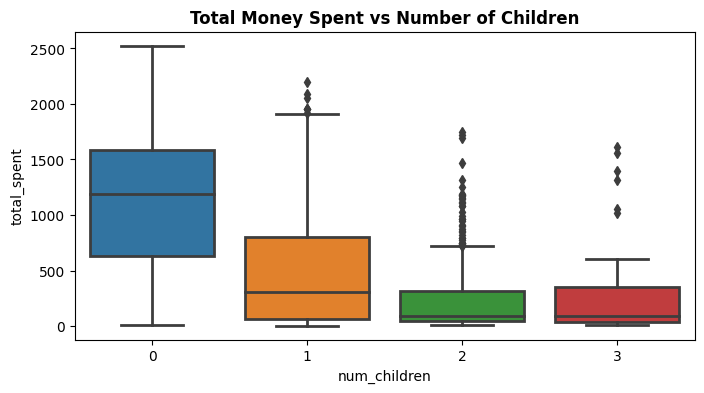

In [107]:
#Total Money Spent vs Number of Children
plt.figure(figsize=(8,4))
plt.title("Total Money Spent vs Number of Children", fontweight='bold')
sns.boxplot(data=df, y='total_spent', x='num_children', linewidth=2)
plt.show()


Percentage of purchases with discount vs Number of Children

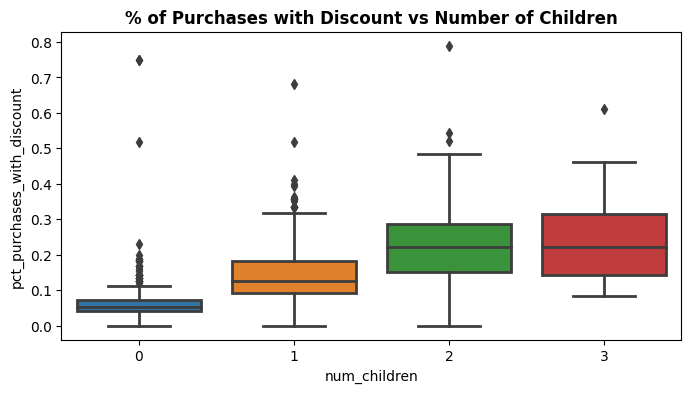

In [108]:
# % of purchases with discount vs Number of Children
plt.figure(figsize=(8, 4))
plt.title("% of Purchases with Discount vs Number of Children", fontweight='bold')
sns.boxplot(data=df, y='pct_purchases_with_discount', x='num_children', linewidth=2)
plt.show()


Percentage of Money Spent on essentials vs Numbers of children

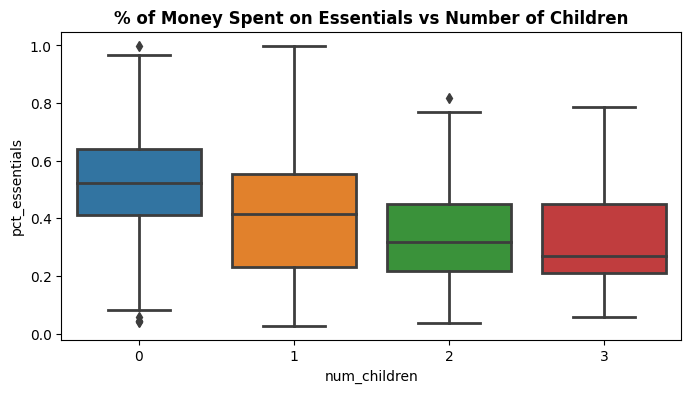

In [110]:
# % of Money Spent on essentials vs Numbers of children
plt.figure(figsize=(8, 4))
plt.title("% of Money Spent on Essentials vs Number of Children", fontweight='bold')
sns.boxplot(data=df, y='pct_essentials', x='num_children', linewidth=2)
plt.show()


Percentage of purchases with discount vs Age Group

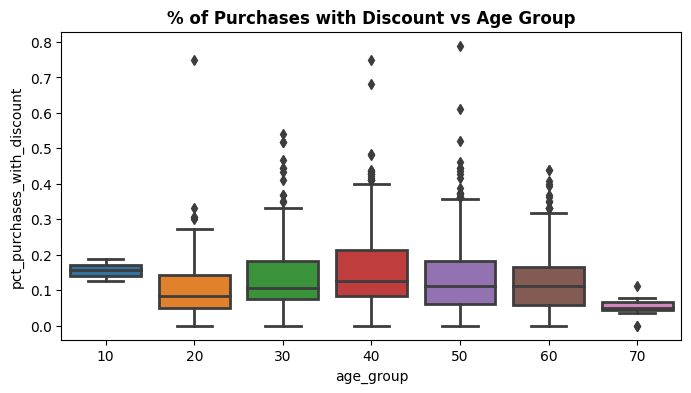

In [112]:
# % of purchases with discount vs Age Group
plt.figure(figsize=(8, 4))
plt.title("% of Purchases with Discount vs Age Group", fontweight='bold')
sns.boxplot(data=df, y='pct_purchases_with_discount', x='age_group', linewidth=2)
plt.show()


Income vs Age Group

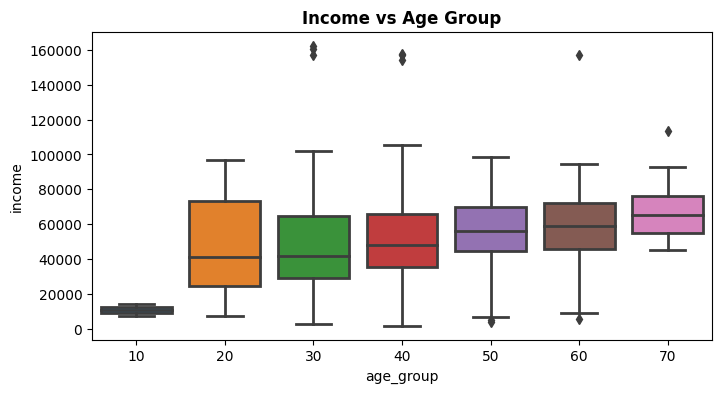

In [113]:
plt.figure(figsize=(8, 4))
plt.title("Income vs Age Group", fontweight='bold')
sns.boxplot(data=df, y='income', x='age_group', linewidth=2)
plt.show()


Total Spent vs Age Group

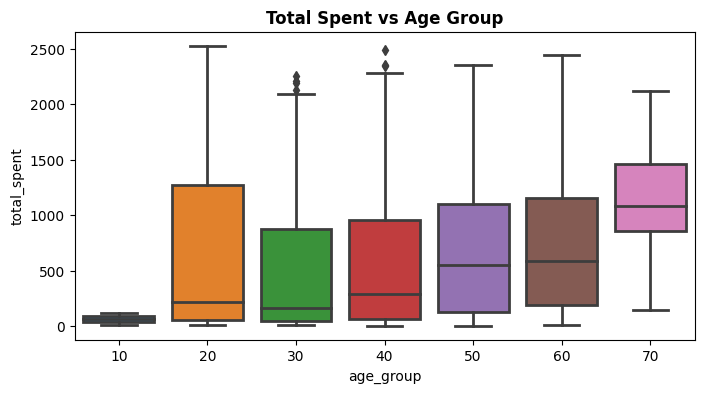

In [115]:
plt.figure(figsize=(8, 4))
plt.title("Total Spent vs Age Group", fontweight='bold')
sns.boxplot(data=df, y='total_spent', x='age_group', linewidth=2)
plt.show()


Percentage of Essential items vs Age

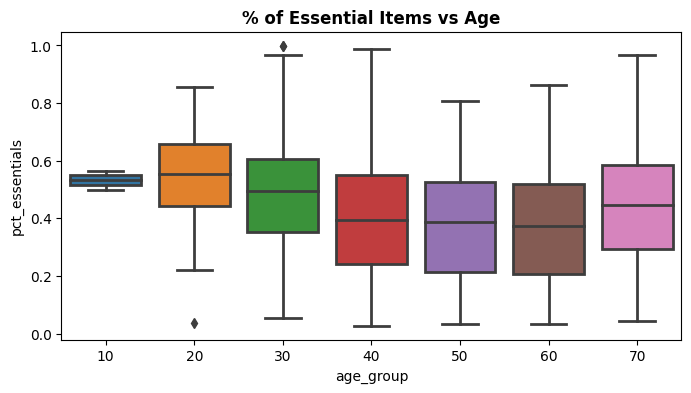

In [117]:
plt.figure(figsize=(8, 4))
plt.title("% of Essential Items vs Age", fontweight='bold')
sns.boxplot(data=df, y='pct_essentials', x='age_group', linewidth=2)
plt.show()


Percentage of Essential items vs Education

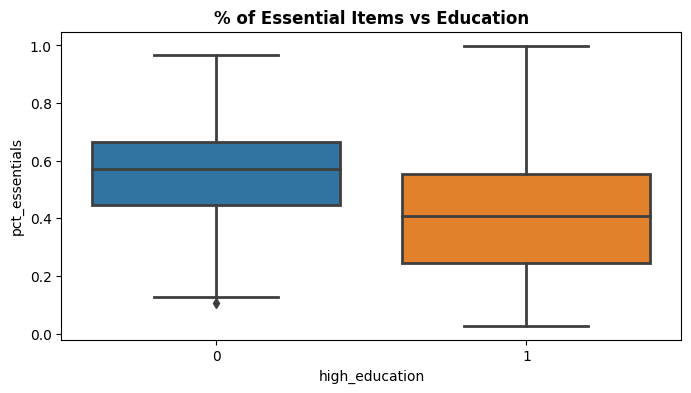

In [119]:
plt.figure(figsize=(8, 4))
plt.title("% of Essential Items vs Education", fontweight='bold')
sns.boxplot(data=df, y='pct_essentials', x='high_education', linewidth=2)
plt.show()


Income vs Number of Purchases

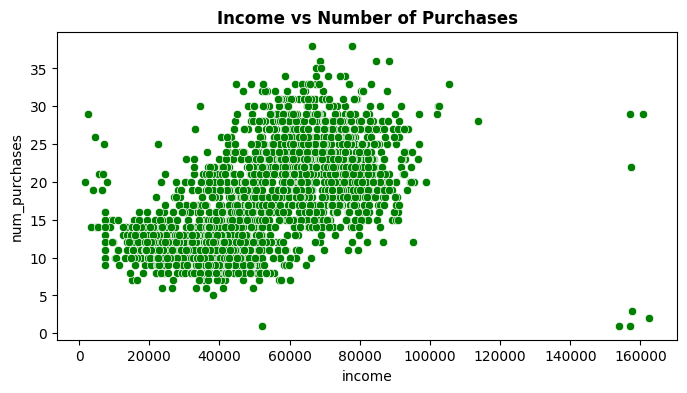

In [120]:
plt.figure(figsize=(8, 4))
plt.title("Income vs Number of Purchases", fontweight='bold')
sns.scatterplot(data=df, x='income', y='num_purchases', color='green')
plt.show()


Income vs Total Money Spent

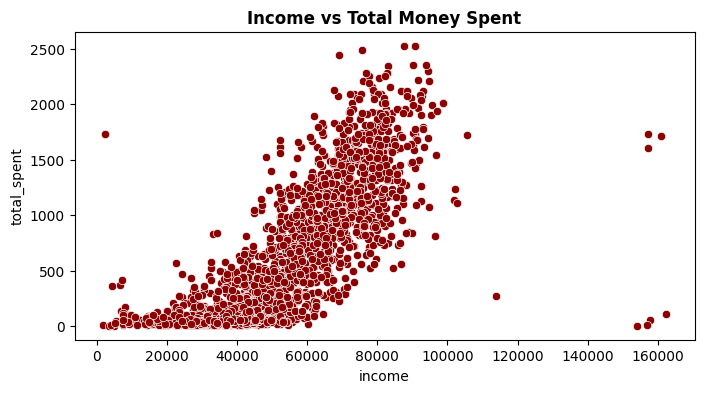

In [122]:
plt.figure(figsize=(8, 4))
plt.title("Income vs Total Money Spent", fontweight='bold')
sns.scatterplot(data=df, x='income', y='total_spent', color='darkred')
plt.show()


Income vs % of purchases with discount

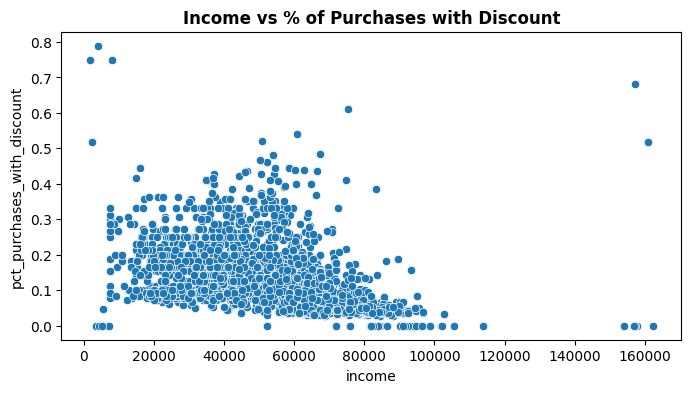

In [123]:
plt.figure(figsize=(8, 4))
plt.title("Income vs % of Purchases with Discount", fontweight='bold')
sns.scatterplot(data=df, x='income', y='pct_purchases_with_discount')
plt.show()


In [124]:
df = df.drop(['age_group', 'days_since_enrollment'], axis = 1)

From the visualizations, we can see some things:

People with no children: Spend less money, are less inclined to wait for discounts to buy their items and spend more money on essential items (fruits, fish, meat, sweet).

Older people have a higher income

People with higher income spend more money, and are less inclined to wait for discounts to buy their items.

##**Clustering**

**Standard Scaler**

Some of the transformations on our data (PCA and Clustering) will envolve measuring distances. That can be problematic, considering that some features have very different ranges. We need to use the StandardScaler, so they can all have a similar range (mostly between -1 to 1).



In [125]:
# Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
display(df_scaled[:5].T)

,0,1,2,3,4
high_education,0.359,0.359,0.359,0.359,0.359
income,0.289,-0.262,0.918,-1.183,0.296
num_deals_purchases,0.349,-0.169,-0.686,-0.169,1.384
total_spent,1.680,-0.962,0.283,-0.919,-0.306
pct_essentials,0.679,-0.262,-0.125,1.427,0.687
num_purchases,1.701,-1.354,0.937,-0.896,0.173
num_children,-1.264,1.395,-1.264,0.065,0.065
pct_purchases_with_discount,-0.346,0.905,-0.996,0.320,1.336
age,1.017,1.273,0.333,-1.291,-1.034
relationship,-1.348,-1.348,0.742,0.742,0.742


**Principal Components Analysis (PCA)**

In our dataset, we have a high number of features and a lot of them have a certain level of correlation between each other, and are somewhat redundant. Performing a dimensionality reduction technique is a good option to reduce the number of features, decreasing the computation cost of the algorithm, while maintaining a good amount of information from the original dataset.

This step is not mandatory, and is not really clear whether to use PCA before clustering really gives us better results. That is particularly tricky, since clustering is a non-supervisioned algorithm, which makes it harder to assess its performance.

Now, performing the PCA, we need to determine how many principal components we'll need to maintain about 70%~80% of variance of the original data.

In [132]:
# Determining the number of principal components

variance_ratio = {}
for i in range(1, len(df_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()*100


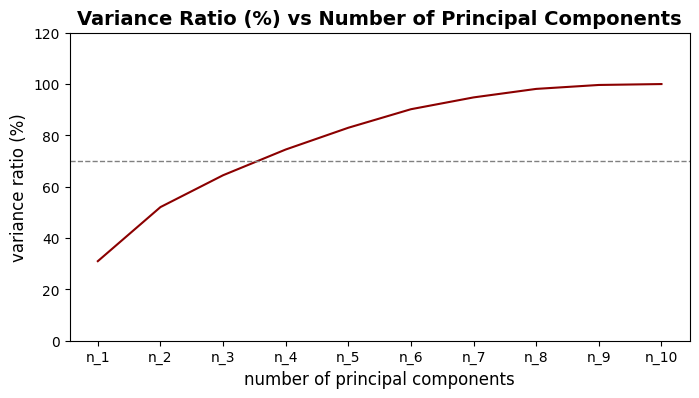

In [129]:
plt.figure(figsize = (8, 4))
plt.plot(variance_ratio.keys(), variance_ratio.values(), color = 'darkred')
plt.axhline(70, color = 'gray', ls = '--', lw = 1)
plt.title("Variance Ratio (%) vs Number of Principal Components", fontsize = 14, fontweight = 'bold')
plt.ylabel("variance ratio (%)", fontsize = 12)
plt.xlabel("number of principal components", fontsize = 12)
plt.ylim([0, 120])
plt.show()

With 4 principal components, we have almost 70% of the variance explained.

In [131]:
# PCA to create a new dataset with 4 Princpal Components.

pca = PCA(n_components = 4, random_state = 123)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled),
                      columns = (["PC1", "PC2", "PC3", "PC4"]))
df_pca.head(10)

,PC1,PC2,PC3,PC4
0,-2.274,1.039,0.657,1.395
1,1.874,0.221,-1.444,1.300
2,-2.033,-0.039,-0.403,-0.785
3,1.362,-1.679,0.632,-0.543
4,0.936,0.761,1.514,-0.494
5,-0.979,0.881,-0.501,-0.800
6,0.003,0.681,0.827,1.465
7,0.840,-0.916,0.079,-0.640
8,0.578,-1.761,-0.250,-0.675
9,1.237,0.176,-2.292,-0.920


Now we have a new dataset with the 4 principal components. In the next step, we are going to apply the k-means on this new dataset.

**K-Means**

We are going to use the k-means algorithm to create our clusters. First, we'll need to determine the ideal number of clusters. We are going to to that by comparing two techniques: the elbow method and the silhouette score.

In the elbow method, we plot the WCSS vs the number of clusters. The WCSS is the sum of squared distance between each point and the centroid in a cluster. Naturally, as we increase the number of clusters, this value will always get smaller.

What we are looking for is a value of N that, from that point forward, the decrease of WCSS won't be very significative.

In [133]:
# Determining the ideal number of clusters: Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)


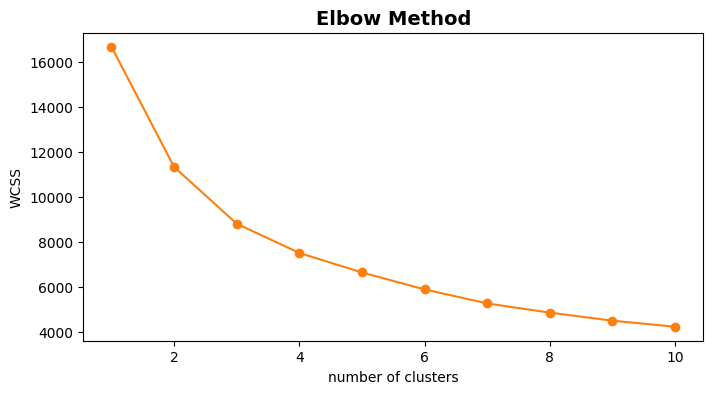

In [135]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker='o', color = 'tab:orange')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Taking a look at the curve, it's not really clear what is the ideal number of clusters. Let's double check it with the silhouette scores. From wikipedia: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [138]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=123)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca)))


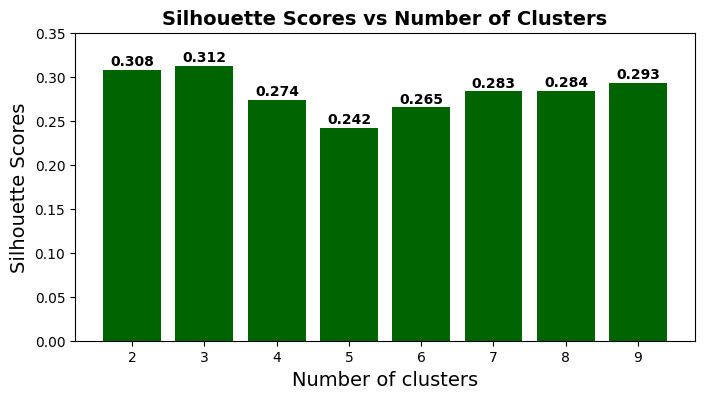

In [139]:
plt.figure(figsize = (8,4))
plt.bar(range(2,10), silhouette_scores, color = 'darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='black', fontweight='bold')
plt.show()

In [140]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,relationship,cluster
0,1,58138.000,3,1617,0.553,29,0,0.103,58,0,2
1,1,46344.000,2,27,0.370,9,2,0.222,61,0,1
2,1,71613.000,1,776,0.397,24,0,0.042,50,1,2
3,1,26646.000,2,53,0.698,12,1,0.167,31,1,1
4,1,58293.000,5,422,0.555,19,1,0.263,34,1,3


**Analyzing the clusters**

compare the clusters

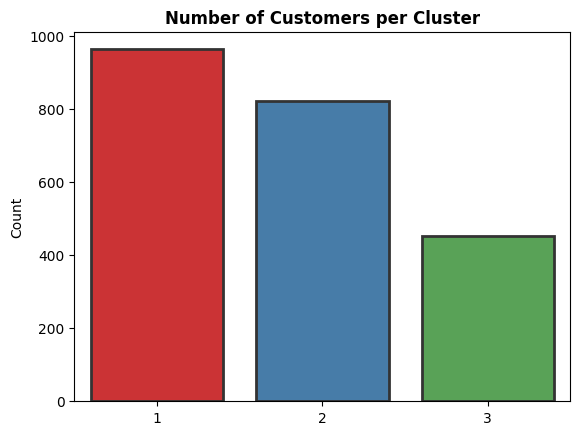

In [142]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)


In [143]:
# Creating an auxiliar dataset to help the evaluation
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

cluster,1,2,3,mean_dataset
high_education,0.828,0.928,0.933,0.886
income,35004.773,72422.603,50877.711,51961.907
num_deals_purchases,1.711,1.457,5.222,2.326
total_spent,108.836,1224.389,540.419,605.987
pct_essentials,0.455,0.446,0.304,0.421
num_purchases,12.330,22.886,20.539,17.866
num_children,1.132,0.401,1.565,0.951
pct_purchases_with_discount,0.140,0.064,0.261,0.136
age,42.857,47.878,49.794,46.102
relationship,0.651,0.620,0.676,0.645


In [144]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2,3
high_education,0.827622,0.928224,0.933481
income,35004.772603,72422.602502,50877.711218
num_deals_purchases,1.711319,1.457421,5.221729
total_spent,108.835929,1224.389294,540.419069
pct_essentials,0.454990,0.445566,0.304409
num_purchases,12.330218,22.885645,20.538803
num_children,1.131880,0.401460,1.565410
pct_purchases_with_discount,0.139721,0.063851,0.260956
age,42.856698,47.878345,49.793792
relationship,0.651090,0.620438,0.676275


<Figure size 800x800 with 0 Axes>

From the table above, we can have a good idea of the differences between the clusters. At first glance, we can see that the income is very important to divide the users: In the cluster 1, we have a lot of customers with medium income, the cluster 2 we have people with lower-income, and the 3, with a higher income.

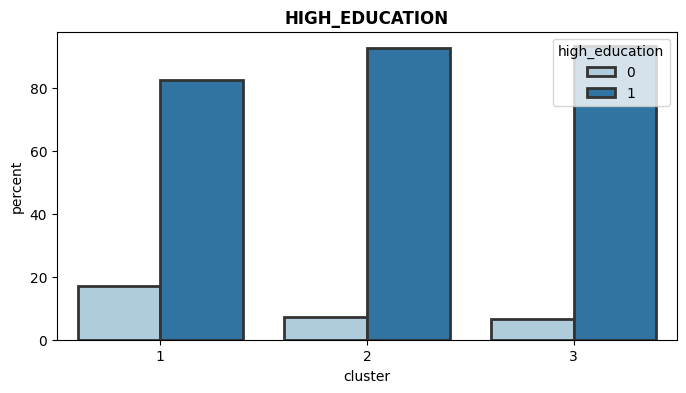

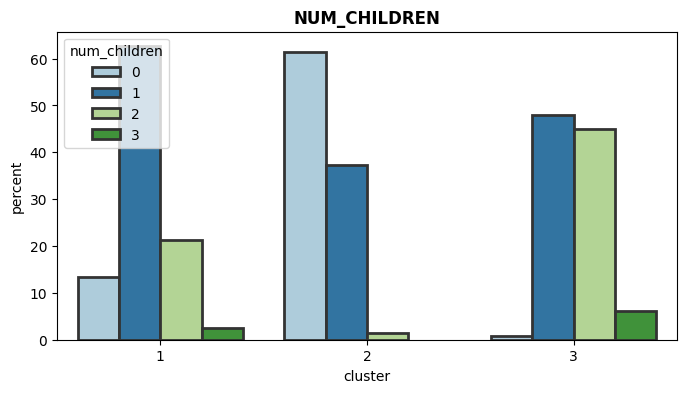

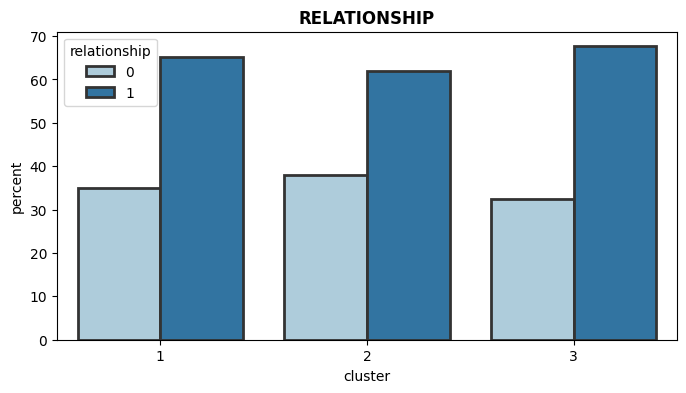

In [146]:
## Categorical Visualizations

cat_columns = ['high_education','num_children', 'relationship']
num_columns = ['income','total_spent','num_purchases',
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show()

Most of the users without high-education falls into the cluster 2

Pretty much everyone of the cluster 1 have at least 1 children.

Pretty much everyone of the cluster 3 have 0 or 1 children

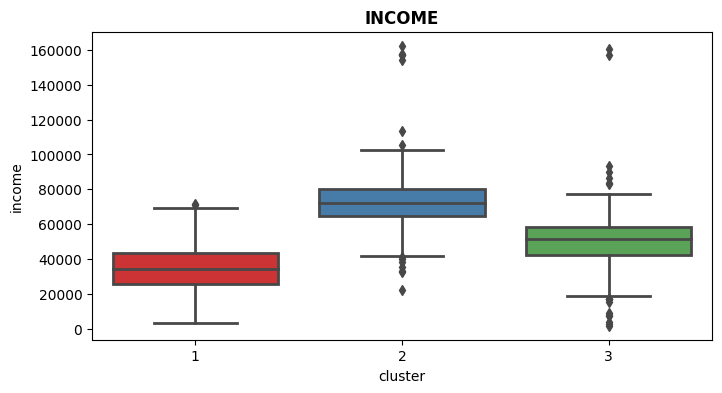

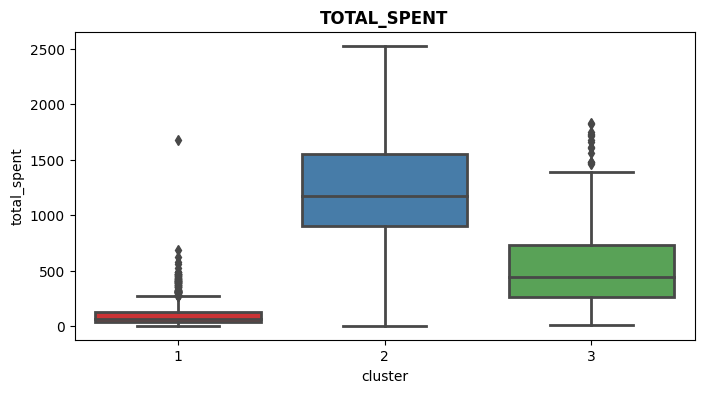

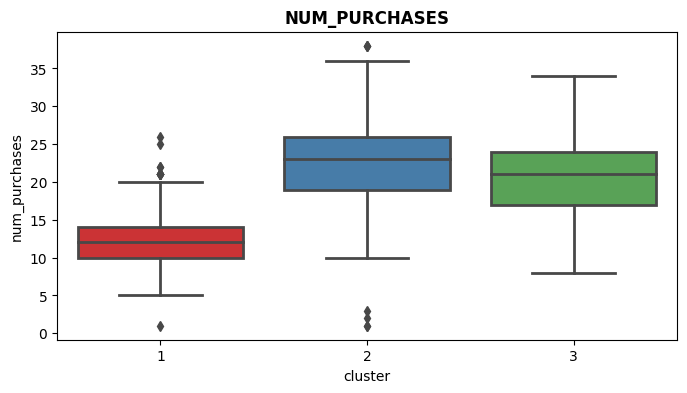

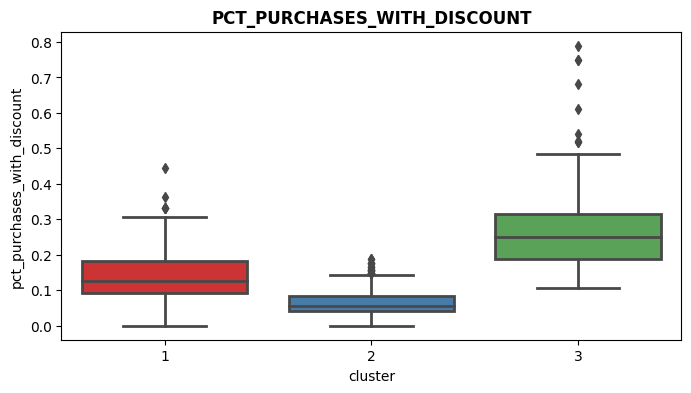

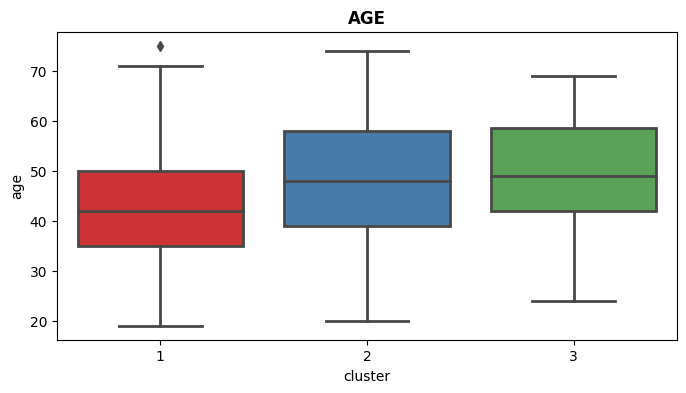

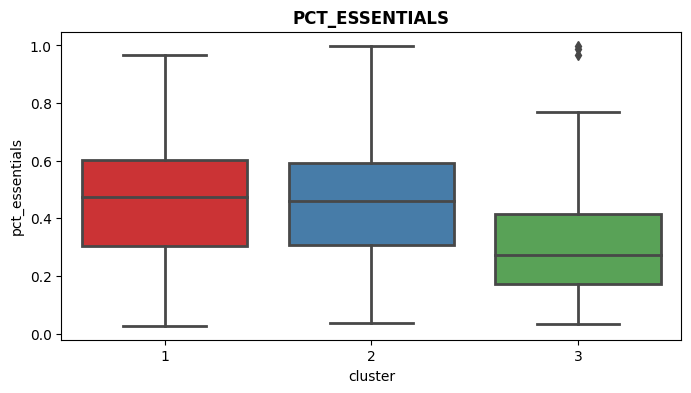

In [148]:
# Numerical Variables

for num in num_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

**Cluster 1:**

About 36% of the customers

High income group

Almost everybody have 0 or 1 children.

Spend a lot of money

Don't buy a lot of things with discount

**Cluster 2:**

Bigger cluster (about 44%)

Smaller income group

Don't spend a lot of money

Don't make a lot opf

Contains most of the people without a high-education

Is a little younger than the average of the dataset

**Cluster 3:**

Smaller part of the customers (about 20%)

Medium income group

Everyone have at least 1 children

Are very sensitive to items with discount

Usually buys non-essential items (wine + gold)

From this clusters, we are a step closer to understand our customers behaviour. The more actionable information is that relation between the customers and the % of items bought with discount:

We could see that people in the cluster 3 buys a lot of non-essential items, and are very sensitive to discount.

On the other hand, people in the cluster 1 doesn't respond very well to discounts.

Therefore, it might be a good idea to concentrate efforts to send special offers to the people in the cluster 3 (and don't send to cluster 1).


People from cluster 1 buy items at full price, and spend a lot of money. Therefore, they are our most valuable customers. The company should make an extra effort to keep them happy.

People in cluster 3 buy a lot of non-essential items, and are very sensitive to discounts. On the other hand, people in cluster 1 don’t respond very well to discounts. Therefore, it might be a good idea to concentrate efforts to send special offers to the people in cluster 3 (and don’t send so much to cluster 1).

## **Conclusion**

In conclusion, this machine learning case study on Customer Segmentation using unsupervised clustering techniques in Google Colab provides a comprehensive and structured approach to solving real-world problems in the retail industry. The project aimed to enhance marketing strategies by identifying distinct customer segments, demonstrating the practical application of machine learning in optimizing business processes.

Throughout the case study, each step, from defining the problem statement to model selection and evaluation, was systematically addressed. The chosen evaluation metrics, including Silhouette Score, Cohesion, and Separation, were aligned with the problem domain, emphasizing the need for meaningful insights into customer segments.

The success of the project relied on effective data collection, preprocessing, and exploratory data analysis, which laid the foundation for accurate clustering and interpretation. The inclusion of relevant visualizations and documentation in the Colab notebook adds transparency to the process, enabling others to understand and replicate the analysis.

The recommendations derived from the analysis are expected to be actionable, providing marketing teams with insights into customer behavior and preferences. The emphasis on interpretability ensures that the machine learning solution is not only accurate but also understandable and usable in a business context.

In summary, this case study showcases the power of machine learning in solving practical business challenges. By following a systematic approach, utilizing appropriate algorithms, and incorporating effective visualization and documentation, the project demonstrates the potential for data-driven insights to drive informed decision-making and improve business outcomes in the retail sector.